In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from env import host, user, password
import acquire
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
from scipy import stats
from pydataset import data
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
import prepare

from env import host, user, password




# ignore warnings
import warnings
warnings.filterwarnings("ignore")

<function prepare.prep_telco(df)>

# Acquire Stage

Main Objective:
Create a connection and bring in the telco-churn data from the Codeup database. 

In [2]:
#importing data from sql: telco_churn dataset.
# this notebook is used for the generation of functions to bring in telco_churn data from the Codeup DB
###################### Acquire Telco_Churn Data ######################

def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
#Objective 1: connect to the Codeup db. REMEMBER TO CREATE .gitignore and include env.py within this!
###################### Acquire Telco_Churn Data ######################
#####################################################################
# Pull in the Telco-churn dataset using pandas.read_sql. SQl query generated within sequel ace then implemented in a variable.
def telco_churn_data():
    '''
    This function reads the telco_churn data from the Codeup db into a df,
    write it to a csv file, and returns the df.
    '''
    # Create SQL query.
    sql_query = '''
    select * from customers as c 
    join contract_types as ct ON c.contract_type_id = ct.contract_type_id
    join internet_service_types as ist ON c.internet_service_type_id = ist.internet_service_type_id
    join payment_types as pt ON c.payment_type_id = pt.payment_type_id;
    '''
    
    # bring in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    
    return df


In [4]:
#####################################################################
#write the telco-churn data to a csv file
def get_telco_churn_data(cached=False):
    '''
    This function reads in telco_churn data from Codeup database and writes data to
    a csv file if cached == False or if cached == True reads in telco_churn df from
    a csv file, returns df.
    '''
    if cached == False or os.path.isfile('telco_churn.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df = telco_churn_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('telco_churn.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv file.
        df = pd.read_csv('telco_churn.csv', index_col=0)
        
    return df

In [5]:
#Final product upon completion of functions should result in df below
#for information regarding function for get_telco_churn refer to prepare.py

Main Takeaway:


# Prepare Stage:

In [6]:
telco_churn = acquire.get_telco_churn_data()

In [7]:
#.acquire function brings in needed data!

In [ ]:
prepare.

In [8]:
telco_churn.head(5).T

,0,1,2,3,4
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes
multiple_lines,Yes,No phone service,No phone service,No phone service,Yes
internet_service_type_id,1,1,1,1,1
online_security,Yes,Yes,Yes,Yes,No


In [9]:
# The shape of the Telco-churn dataframe is 7043 Rows and 27 Columns.
telco_churn.shape

(7043, 27)

In [10]:
#Datatypes: 18 objects, 8 integer64, 1 float64
# 25 Categorical and 2 Continous Numerical.
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [11]:
#Telco-churn Statistical data.
# varibale below adds range to the original .describe() statistaical table.
ds = telco_churn.head().describe()
ds.loc['range'] = ds.loc['max'] - ds.loc['min']
pd.DataFrame(ds).T

,count,mean,std,min,25%,50%,75%,max,range
senior_citizen,5.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.00,0.00
tenure,5.0,53.40,20.019990,20.0,54.00,56.0,65.00,72.00,52.00
internet_service_type_id,5.0,1.00,0.000000,1.0,1.00,1.0,1.00,1.00,0.00
contract_type_id,5.0,3.00,0.000000,3.0,3.00,3.0,3.00,3.00,0.00
payment_type_id,5.0,3.20,0.836660,2.0,3.00,3.0,4.00,4.00,2.00
monthly_charges,5.0,61.05,24.602413,39.4,45.05,45.2,85.15,90.45,51.05
contract_type_id,5.0,3.00,0.000000,3.0,3.00,3.0,3.00,3.00,0.00
internet_service_type_id,5.0,1.00,0.000000,1.0,1.00,1.0,1.00,1.00,0.00
payment_type_id,5.0,3.20,0.836660,2.0,3.00,3.0,4.00,4.00,2.00


### Now investigate the dataframe and look at the data types, dataframe shape, and statistical information.

In [14]:
telco_churn.head(5).T

,0,1,2,3,4
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes
multiple_lines,Yes,No phone service,No phone service,No phone service,Yes
internet_service_type_id,1,1,1,1,1
online_security,Yes,Yes,Yes,Yes,No


In [15]:
# The shape of the Telco-churn dataframe is 7043 Rows and 27 Columns.
telco_churn.shape

(7043, 27)

In [16]:
#Datatypes: 18 objects, 8 integer64, 1 float64
# 25 Categorical and 2 Continous Numerical.
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [2]:
#Telco-churn Statistical data.
# varibale below adds range to the original .describe() statistaical table.
ds = telco_churn.head().describe()
ds.loc['range'] = ds.loc['max'] - ds.loc['min']
pd.DataFrame(ds).T

NameError: name 'telco_churn' is not defined

The objective of this notebook is to inspect the dataset and see if:
- 1.) There is any duplicate values, not in every field but where it would matter.
- 2.) Look for duplicate fields and drop those who are repeated.
- 3.) Inspect fields which could be split into a numerical category.
- 4.) Create dummy variables for those fields we wish to split into a numeric category.
- 5.) Add the dummy columns to the original df!
- 6.) Generate functions within this notebook which will be implemented with in the prepare.py
- 7.) Give a few charts to display data. Pre-exploratory!!!

In [19]:
telco_churn.head(2).T

,0,1
customer_id,0016-QLJIS,0017-DINOC
gender,Female,Male
senior_citizen,0,0
partner,Yes,No
dependents,Yes,No
tenure,65,54
phone_service,Yes,No
multiple_lines,Yes,No phone service
internet_service_type_id,1,1
online_security,Yes,Yes


### Summarize our data:
- head(), describe(), info(), isnull(), value_counts(), shape, ...
- plt.hist(), plt.boxplot()
- document takeaways (nulls, datatypes to change, outliers, ideas for features, etc.)


Import the data and inspect it for nulls, duplicate values and columns, review the data types.

In [20]:
# Displaying all of the datasets columns.
telco_churn.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type_id', 'contract_type',
       'internet_service_type_id', 'internet_service_type', 'payment_type_id',
       'payment_type'],
      dtype='object')

In [21]:
# start looking into the dataset.
telco_churn.info()
# appears there is no nulls within the data set. Need to check and make sure no values are nan as well!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

## Begin cleaning up the table and data

In [22]:
#start with dropping any potential duplicate values.
telco_churn.drop_duplicates(inplace =True)

In [23]:
#Changing the index from numbered records to records by customer_id
telco_churn.set_index('customer_id', drop = True, inplace = True)

In [24]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    7043 non-null   object 
 1   senior_citizen            7043 non-null   int64  
 2   partner                   7043 non-null   object 
 3   dependents                7043 non-null   object 
 4   tenure                    7043 non-null   int64  
 5   phone_service             7043 non-null   object 
 6   multiple_lines            7043 non-null   object 
 7   internet_service_type_id  7043 non-null   int64  
 8   online_security           7043 non-null   object 
 9   online_backup             7043 non-null   object 
 10  device_protection         7043 non-null   object 
 11  tech_support              7043 non-null   object 
 12  streaming_tv              7043 non-null   object 
 13  streaming_movies          7043 non-null   object 
 14

In [25]:
#are there any empty records? replaced the empty values with NaN
telco_churn.replace(' ', np.nan, inplace = True)

In [26]:
#double checking the dataset for nulls
# appears total charges has 11 nan values.
nan_check = telco_churn.isna().sum()
nan_check

gender                       0
senior_citizen               0
partner                      0
dependents                   0
tenure                       0
phone_service                0
multiple_lines               0
internet_service_type_id     0
online_security              0
online_backup                0
device_protection            0
tech_support                 0
streaming_tv                 0
streaming_movies             0
contract_type_id             0
paperless_billing            0
payment_type_id              0
monthly_charges              0
total_charges               11
churn                        0
contract_type_id             0
contract_type                0
internet_service_type_id     0
internet_service_type        0
payment_type_id              0
payment_type                 0
dtype: int64

In [27]:
#dropped the nan values within the total charges column
telco_churn.dropna(inplace =True)
telco_churn.count()

gender                      7032
senior_citizen              7032
partner                     7032
dependents                  7032
tenure                      7032
phone_service               7032
multiple_lines              7032
internet_service_type_id    7032
online_security             7032
online_backup               7032
device_protection           7032
tech_support                7032
streaming_tv                7032
streaming_movies            7032
contract_type_id            7032
paperless_billing           7032
payment_type_id             7032
monthly_charges             7032
total_charges               7032
churn                       7032
contract_type_id            7032
contract_type               7032
internet_service_type_id    7032
internet_service_type       7032
payment_type_id             7032
payment_type                7032
dtype: int64

In [28]:
# statistical details of the dataset.
telco_churn.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,contract_type_id,internet_service_type_id,payment_type_id
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,1.872582,1.688567,2.315557,64.798208,1.688567,1.872582,2.315557
std,0.368844,24.545260,0.737271,0.832934,1.149523,30.085974,0.832934,0.737271,1.149523
min,0.000000,1.000000,1.000000,1.000000,1.000000,18.250000,1.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.587500,1.000000,1.000000,1.000000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1.000000,2.000000,2.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.862500,2.000000,2.000000,3.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,3.000000,3.000000,4.000000


In [29]:
# dropped duplicate columns.
telco_churn = telco_churn.loc[:, ~telco_churn.columns.duplicated()]

In [30]:
#total_charges was originally the dtype object, but needs to be changed to a float64.
telco_churn = telco_churn.astype({'total_charges': 'float64'})

In [31]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    7032 non-null   object 
 1   senior_citizen            7032 non-null   int64  
 2   partner                   7032 non-null   object 
 3   dependents                7032 non-null   object 
 4   tenure                    7032 non-null   int64  
 5   phone_service             7032 non-null   object 
 6   multiple_lines            7032 non-null   object 
 7   internet_service_type_id  7032 non-null   int64  
 8   online_security           7032 non-null   object 
 9   online_backup             7032 non-null   object 
 10  device_protection         7032 non-null   object 
 11  tech_support              7032 non-null   object 
 12  streaming_tv              7032 non-null   object 
 13  streaming_movies          7032 non-null   object 
 14

In [32]:
telco_columns = telco_churn.columns
telco_columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

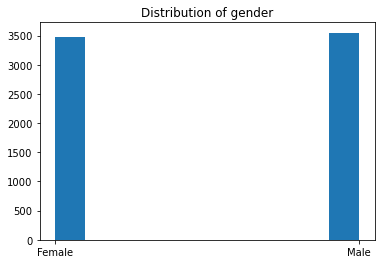

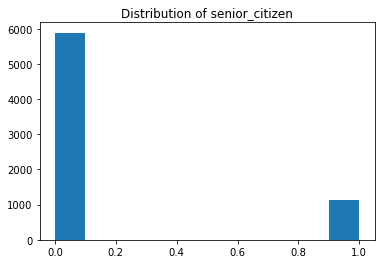

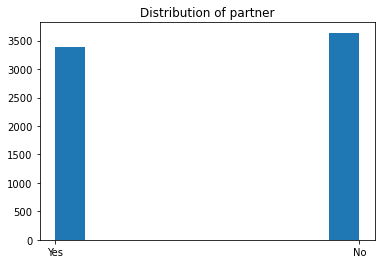

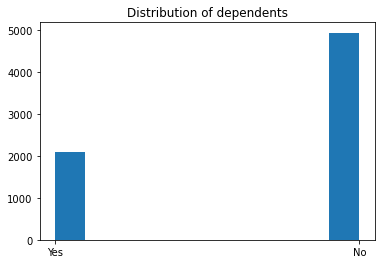

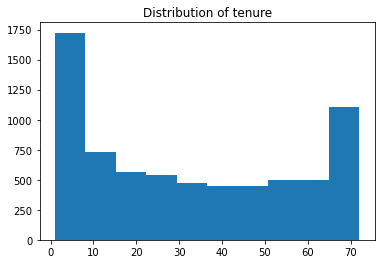

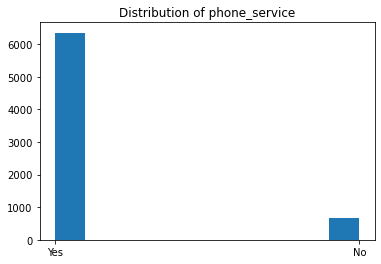

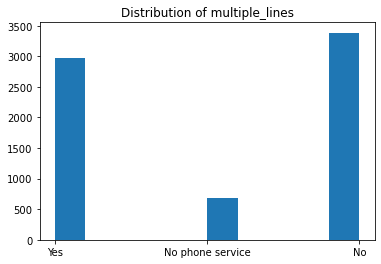

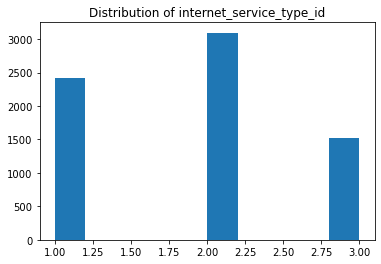

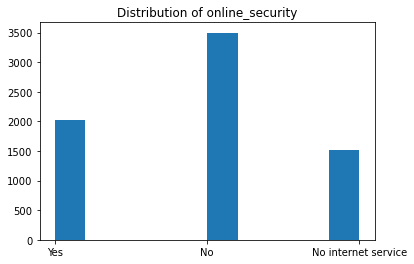

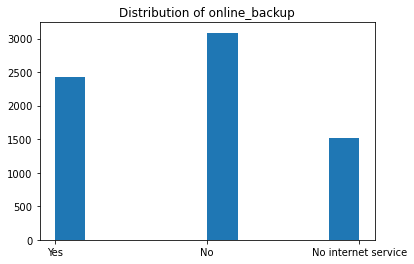

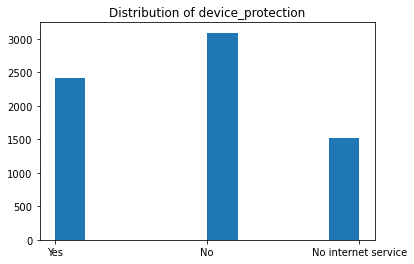

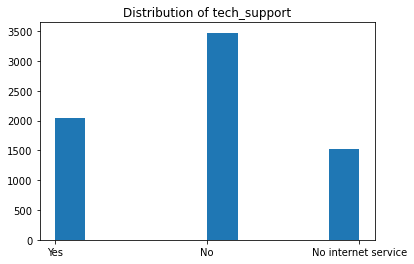

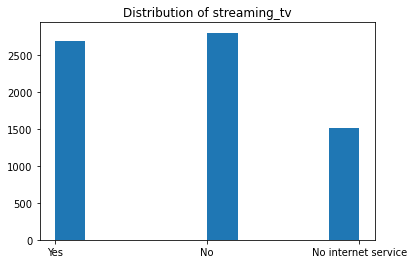

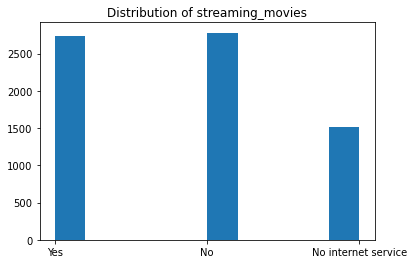

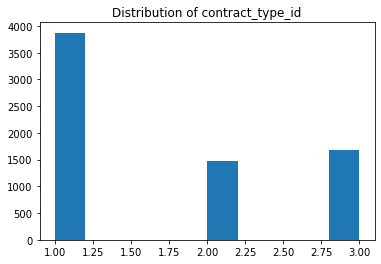

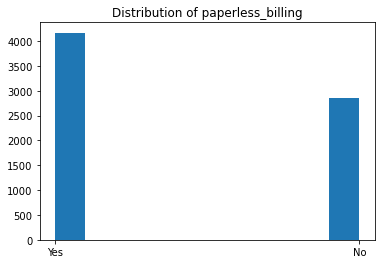

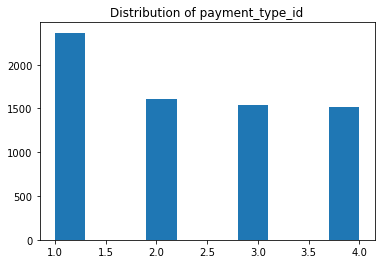

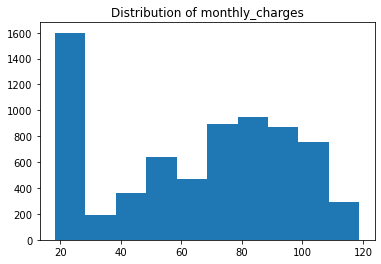

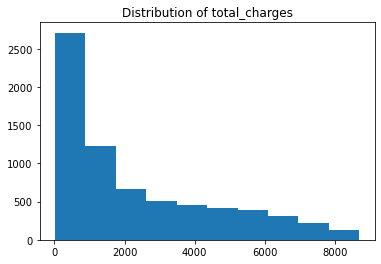

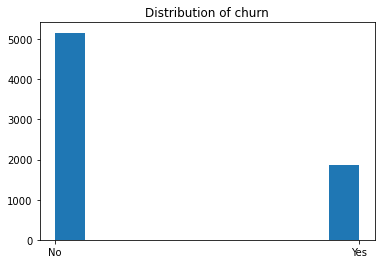

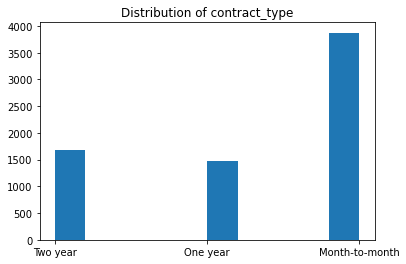

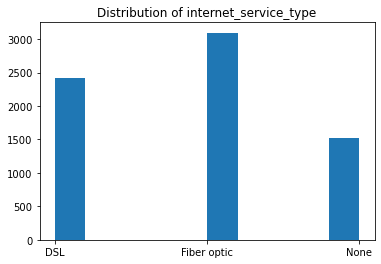

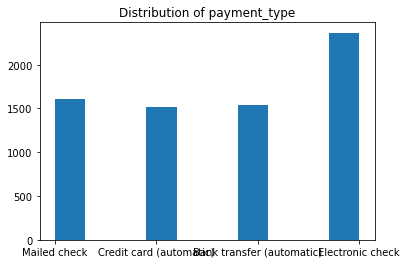

In [33]:
for col in telco_columns:
    plt.hist(telco_churn[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [34]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    7032 non-null   object 
 1   senior_citizen            7032 non-null   int64  
 2   partner                   7032 non-null   object 
 3   dependents                7032 non-null   object 
 4   tenure                    7032 non-null   int64  
 5   phone_service             7032 non-null   object 
 6   multiple_lines            7032 non-null   object 
 7   internet_service_type_id  7032 non-null   int64  
 8   online_security           7032 non-null   object 
 9   online_backup             7032 non-null   object 
 10  device_protection         7032 non-null   object 
 11  tech_support              7032 non-null   object 
 12  streaming_tv              7032 non-null   object 
 13  streaming_movies          7032 non-null   object 
 14

In [35]:
#Changing binary str variables to numerical based value of 1 and 0.

In [36]:
def create_dummies(df):
    '''
    This function is used to create dummy columns for my non binary columns
    '''
    # create dummies for payment_type, internet_service_type, and contract_type
    payment_dummies = pd.get_dummies(df.payment_type, drop_first=False)
    internet_dummies = pd.get_dummies(df.internet_service_type, drop_first=False)
    contract_dummies = pd.get_dummies(df.contract_type, drop_first=False)

    # now we concatenate our dummy dataframes with the original
    df = pd.concat([df, payment_dummies, internet_dummies, contract_dummies], axis=1)
    df = df.rename(columns = {'None': 'no_internet'})
    

    # now I am dropping all my original string columns that I made dummies with and dropping
    #the type_id columns since they are duplicates of the string column
    df = df.drop(columns=['contract_type', 'internet_service_type', 'no_internet'])
    return df

In [37]:
#implementing the create dummies function on the df.
telco_churn = create_dummies(telco_churn)

In [38]:
#replacing several fields from str values to numerical based values.
telco_churn.gender = telco_churn.gender.replace({'Female': 1, 'Male':0})
telco_churn.partner = telco_churn.partner.replace({'Yes': 1, 'No':0})
telco_churn.dependents = telco_churn.dependents.replace({'Yes': 1, 'No':0})
telco_churn.churn = telco_churn.churn.replace({'Yes': 1, 'No':0})
telco_churn.phone_service= telco_churn.phone_service.replace({'Yes': 1, 'No':0})
telco_churn.paperless_billing = telco_churn.paperless_billing.replace({'Yes': 1, 'No':0})

In [39]:
#created a new field to change tenure from months to year.
telco_churn['tenure_year'] =  round(telco_churn['tenure']/12,0)

In [40]:
#dropping original fields and renaming fields.
telco_churn.drop(columns = ['multiple_lines','online_security', 'online_backup', 'device_protection', 'tech_support','streaming_tv', 'streaming_movies','paperless_billing','contract_type_id','paperless_billing', 'payment_type_id','payment_type'], inplace =True)
telco_churn = telco_churn.rename(columns = {'tenure': 'tenure_months', 'Bank transfer (automatic)': 'bank_transfer_auto', 'Credit card (automatic)': 'credit_card_auto', 'Mailed check': 'mailed_check','Fiber optic': 'fiber_optic', 'Electronic check': 'electronic_check'})

In [41]:
#creating new field representing autopay and dropping payment type fields.
telco_churn['auto_pay'] = telco_churn['bank_transfer_auto'] + telco_churn['credit_card_auto']
telco_churn.drop(columns = ['bank_transfer_auto', 'credit_card_auto',  'mailed_check','electronic_check'], inplace = True)

In [42]:
list(telco_churn.columns)

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure_months',
 'phone_service',
 'internet_service_type_id',
 'monthly_charges',
 'total_charges',
 'churn',
 'DSL',
 'fiber_optic',
 'Month-to-month',
 'One year',
 'Two year',
 'tenure_year',
 'auto_pay']

In [43]:
original_df_corr = telco_churn.corr()
original_df_corr['churn'].sort_values(ascending=False)

churn                       1.000000
Month-to-month              0.404565
fiber_optic                 0.307463
monthly_charges             0.192858
senior_citizen              0.150541
phone_service               0.011691
gender                      0.008545
internet_service_type_id   -0.047097
DSL                        -0.124141
partner                    -0.149982
dependents                 -0.163128
One year                   -0.178225
total_charges              -0.199484
auto_pay                   -0.210420
Two year                   -0.301552
tenure_year                -0.353056
tenure_months              -0.354049
Name: churn, dtype: float64

In [44]:
#sort values and create variable which has the corr features.
og_cols= original_df_corr['churn'].sort_values(ascending=False)
og_cols

churn                       1.000000
Month-to-month              0.404565
fiber_optic                 0.307463
monthly_charges             0.192858
senior_citizen              0.150541
phone_service               0.011691
gender                      0.008545
internet_service_type_id   -0.047097
DSL                        -0.124141
partner                    -0.149982
dependents                 -0.163128
One year                   -0.178225
total_charges              -0.199484
auto_pay                   -0.210420
Two year                   -0.301552
tenure_year                -0.353056
tenure_months              -0.354049
Name: churn, dtype: float64

In [45]:
# variable which creates a list of features whos correlation percentages greater than  18 % and less than 18 %.
column_list = list(og_cols[og_cols > .18].index)  + list(og_cols[og_cols < (-.18)].index)
column_list

['churn',
 'Month-to-month',
 'fiber_optic',
 'monthly_charges',
 'total_charges',
 'auto_pay',
 'Two year',
 'tenure_year',
 'tenure_months']

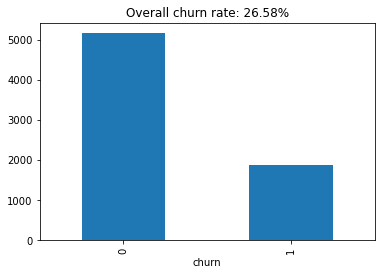

In [46]:
telco_churn.churn.value_counts().sort_index().plot.bar()
churn_rate = telco_churn.churn.mean()
plt.title(f'Overall churn rate: {churn_rate:.2%}')
plt.xlabel('churn')
plt.show()

In [47]:
# Train size: 20% test, 80% train_validate, looking at the 80% train_validate.
# 80% train_validate: 30% validate, 70% train, looking at the 70


In [48]:
#function created to split the data into a training, validate and test df
def telco_split(df):
    '''
    This function take in the telco_churn data acquired by get_telco_data,
    performs a split and stratifies churn column.
    Returns train, validate, and test dfs.
    '''
    #20% test, 80% train_validate
    train_validate, test = train_test_split(df, test_size=0.2, 
                                        random_state=1349, 
                                        stratify=df.churn)
    # 80% train_validate: 30% validate, 70% train.
    train, validate = train_test_split(train_validate, train_size=0.7, 
                                   random_state=1349, 
                                   stratify=train_validate.churn)
    return train, validate, test





In [49]:
#Splitting the data in train, validate and test
train, validate, test = telco_split(telco_churn)

In [50]:
# Looking at the row and columns of the DF
train.shape, validate.shape, test.shape

((3937, 17), (1688, 17), (1407, 17))

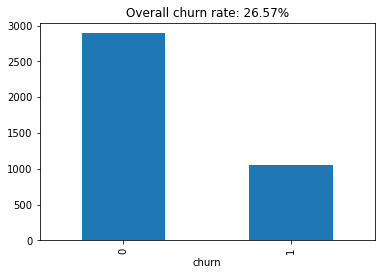

In [51]:
#looking at overall churn rate.
train.churn.value_counts().sort_index().plot.bar()
churn_rate = train.churn.mean()
plt.title(f'Overall churn rate: {churn_rate:.2%}')
plt.xlabel('churn')
plt.show()

In [52]:
train_corr = train.corr().reset_index()
train_corr.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
index,gender,senior_citizen,partner,dependents,tenure_months,phone_service,internet_service_type_id,monthly_charges,total_charges,churn,DSL,fiber_optic,Month-to-month,One year,Two year,tenure_year,auto_pay
gender,1,0.0189389,4.13239e-05,-0.019311,-0.00971591,-0.00613821,0.00188388,0.0172216,-0.00134437,0.00665888,-0.0101343,0.0165195,0.0114661,-0.00398682,-0.00955784,-0.0100687,0.00826339
senior_citizen,0.0189389,1,0.00498783,-0.208847,0.0190898,0.00415726,-0.0278047,0.205728,0.0992579,0.139556,-0.108389,0.247757,0.130232,-0.0464107,-0.107466,0.0219789,-0.0246559
partner,4.13239e-05,0.00498783,1,0.451373,0.380911,0.0387024,0.00380386,0.118643,0.324977,-0.135987,-0.0176173,0.0279331,-0.277372,0.0759212,0.251061,0.37872,0.152424
dependents,-0.019311,-0.208847,0.451373,1,0.157648,0.00825108,0.0381684,-0.084058,0.070202,-0.149845,0.0390009,-0.130893,-0.206233,0.0551877,0.187891,0.157602,0.084169
tenure_months,-0.00971591,0.0190898,0.380911,0.157648,1,0.0233355,-0.0106796,0.252441,0.826046,-0.350081,-0.0098843,0.0346646,-0.655901,0.205849,0.568227,0.99212,0.399952
phone_service,-0.00613821,0.00415726,0.0387024,0.00825108,0.0233355,1,0.371188,0.2398,0.117261,-0.0117801,-0.434287,0.277393,-0.0133442,-0.0152245,0.0303377,0.0224008,0.00506884
internet_service_type_id,0.00188388,-0.0278047,0.00380386,0.0381684,-0.0106796,0.371188,1,-0.332112,-0.167151,-0.058992,-0.854706,0.146507,-0.0948841,0.00158353,0.109473,-0.012165,-0.0439347
monthly_charges,0.0172216,0.205728,0.118643,-0.084058,0.252441,0.2398,-0.332112,1,0.65592,0.196942,-0.15436,0.786402,0.0433194,0.00397881,-0.0545282,0.250036,0.0625911
total_charges,-0.00134437,0.0992579,0.324977,0.070202,0.826046,0.117261,-0.167151,0.65592,1,-0.194262,-0.0665758,0.374618,-0.456423,0.168379,0.371102,0.818817,0.309239


In [53]:
train_corr.set_index('index', drop = True, inplace = True)

In [54]:
train_corr = pd.DataFrame(train_corr[train_corr.index[9]]).sort_values(by ='churn')
train_corr

,churn
index,
tenure_months,-0.350081
tenure_year,-0.348994
Two year,-0.301909
auto_pay,-0.216455
total_charges,-0.194262
One year,-0.178959
dependents,-0.149845
partner,-0.135987
DSL,-0.118365


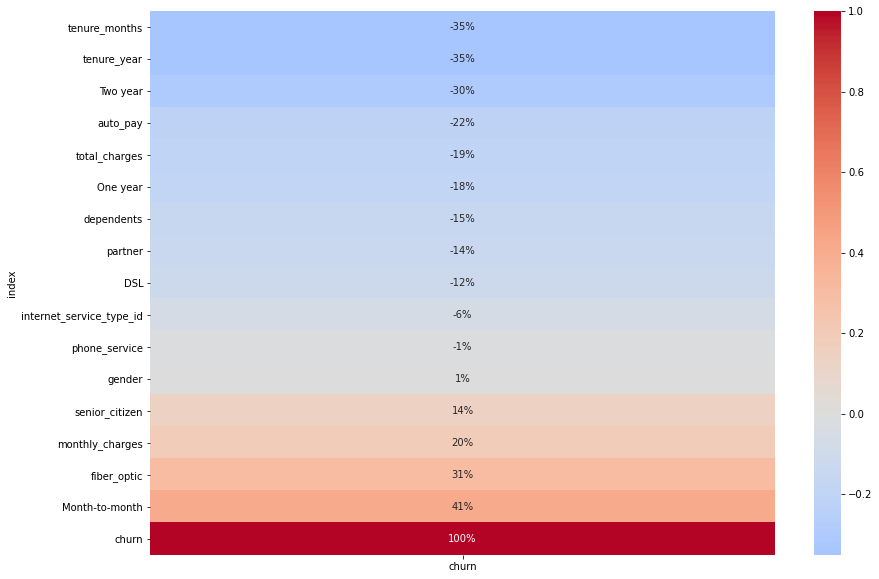

In [55]:
#The heat map clearly shows there is a correlation between churn and fiber optic, electronic checking and monthly charges.
plt.figure(figsize=(14, 10))
sns.heatmap(train_corr, cmap = 'coolwarm', center = 0, annot = True, fmt = '.0%',)
plt.show()

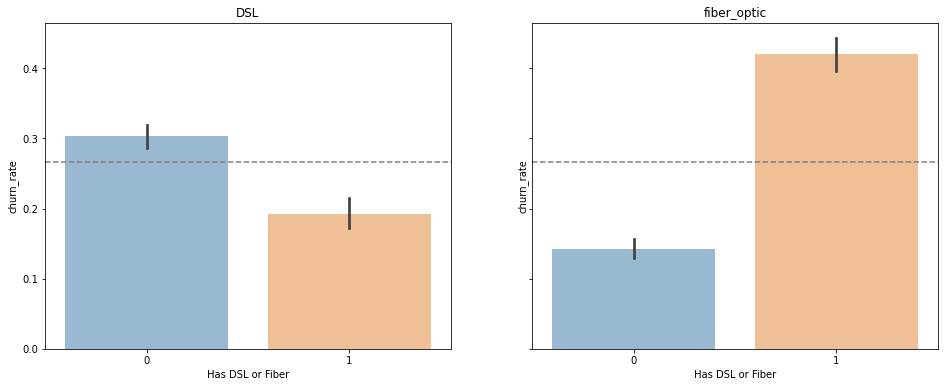

In [56]:
#Comparing internet service types
features = ['DSL', 'fiber_optic',]

churn_rate = train.churn.mean()
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('Has DSL or Fiber')
    ax[i].set_ylabel('churn_rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

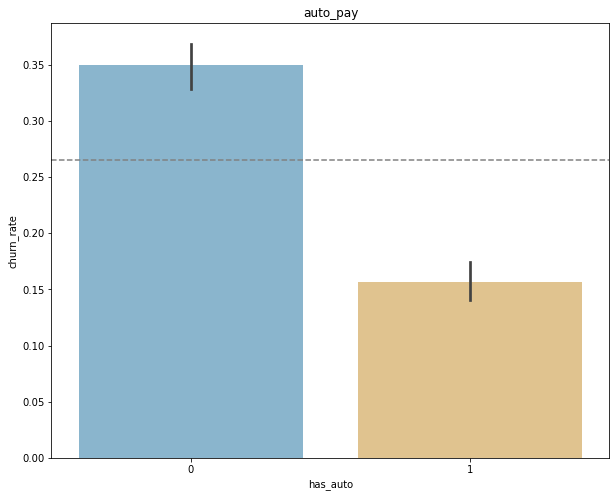

In [57]:
features = ['auto_pay']
plt.figure(figsize=(10, 8))
churn_rate = train.churn.mean()
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data = train, alpha=0.5, palette ='colorblind')
    plt.xlabel('has_auto')
    plt.ylabel('churn_rate')
    plt.title(feature)
    plt.axhline(churn_rate, ls='--', color='grey')

In [58]:
# next is hypothesis test using tests, ttest, correlation, chi remember alpha and p value t statsitic.

In [5]:
plt.figure(figsize=(14, 10))
sns.catplot(x='tenure_months', y='monthly_charges', data=train, hue='churn')
plt.show()

NameError: name 'plt' is not defined

In [3]:
cat_vars = ['tenure_months', 'auto_pay', 'fiber_optic', 'Month-to-month']
quant_vars = ['monthly_charges', 'total_charges']

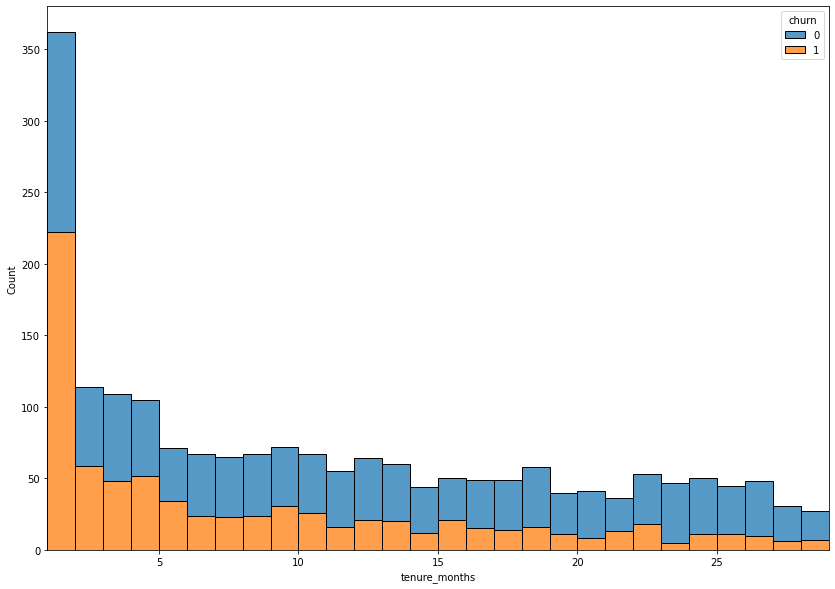

In [61]:
plt.figure(figsize=(14, 10))
sns.histplot(data=train, x='tenure_months', hue='churn', multiple='stack',binwidth =1)
plt.xlim(1,train.tenure_months.median())
plt.show()

## Statistical Tests:

Hypothesis Test 1

Hypothesis Null : autopay method is independent of churn.

Hypothesis Alternative : "autopay methods is not independent of churn".

In [62]:
# examine the 3 types of internet service and the relation to churn
# make a crosstab
# internet_service_types values = (0 = 'None', 1 = 'DSL', 2 = 'Fiber optic')
# churn values = (No = 0, Yes = 1)
observed1 = pd.crosstab(train.auto_pay, train.churn)

# run the chi^2 test
chi2, p, degf, expected = stats.chi2_contingency(observed1)

print('Observed\n')
print(observed1.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = "autopay method is independent of churn"

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')

Observed

[[1448  778]
 [1443  268]]
---
Expected

[[1634  591]
 [1256  454]]
---

chi^2 = 183.4720
p     = 0.0000

We can reject the null hypothesis that autopay method is independent of churn


### Hypothesis Test 2

Hypothesis Null : internet service type fiber optic is independent of churn.


Hypothesis Alternative : "internet service type fiber optic is not independent of churn".




### CHI Test
- Churn(categorical)
- Fiber Optic (categorical)

In [63]:
observed1 = pd.crosstab(train.fiber_optic, train.churn)

# run the chi^2 test
chi2, p, degf, expected = stats.chi2_contingency(observed1)

print('Observed\n')
print(observed1.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = "internet service type fiber optic is independent of churn"

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')

Observed

[[1880  312]
 [1011  734]]
---
Expected

[[1609  582]
 [1281  463]]
---

chi^2 = 384.2585
p     = 0.0000

We can reject the null hypothesis that internet service type fiber optic is independent of churn


### One Sample T_test
- Churn(categorical)
- Tenure_months(continous)

### Hypothesis Test 3

Hypothesis Null : there is no difference between tenure_months and churn.


Hypothesis Alternative : there is a difference between tenure_months and churn.


One of the assumptions of the t-test is that the continuous variable is normally distributed. To check this, we can make a quick visualization:

In [64]:
#compare the mean and median.
train.tenure_months.mean(), train.tenure_months.median()

(32.49428498856998, 29.0)

<AxesSubplot:xlabel='tenure_months', ylabel='Density'>

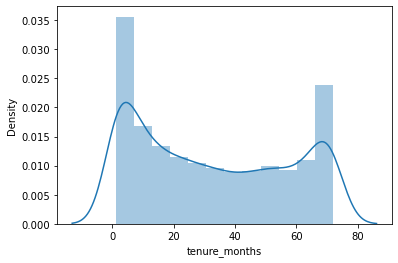

In [65]:
# Chart for distribution Analysis
sns.distplot(train.tenure_months)

In [66]:
#The above chart doesnt present an ideal normal distribution, looking it is over 30 and mean and median values are nearly identical.
#So we will assume a normal distribution.

In [67]:
#cont vs categorical
# make a subset 
x1 = train.tenure_months

# make a subset for 
x2 = train.churn.mean()

# run a 2 sample, 2 tail t-test
t_stat, p = stats.ttest_1samp(x1, x2)

print(f'\nstatistic = {t_stat:.4f}')
print(f'p_value = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = "there is no difference between tenure_months and churn."

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


statistic = 81.9624
p_value = 0.0000

We can reject the null hypothesis that there is no difference between tenure_months and churn.


# Modeling

#Begin by asking what is our Baseline Prediction? We know our target is churn. So we will look at our baseline being the most fequently occuring in our target.

#Based on the value_counts we can see that no churn is the most frequent so we will set our baseline prediction to zero

In [68]:
#Begin by asking what is our Baseline Prediction? We know our target is churn. So we will look at our baseline being the most fequently occuring in our target.
#Based on the value_counts we can see that no churn is the most frequent so we will set our baseline prediction to zero
train.churn.value_counts() 

0    2891
1    1046
Name: churn, dtype: int64

### Baseline Accuracy

In [69]:
train['baseline_prediction'] = 0

In [70]:
baseline_acc =(train.baseline_prediction == train.churn).mean()
f'baseline_acc

0.7343154686309372

In [71]:
train.drop(columns ='baseline_prediction', inplace = True)
#do not need baseline_prediction_column anymore


In [72]:
baseline_accuracy = 0.7343154686309372

In [ ]:
# Now creating the features (X_train) which DF will exclude the target churn.
#y_train is a series of the DF it is the target churn

In [90]:
X_train = train.drop(columns='churn')
y_train = train[['churn']]
X_validate, y_validate = validate.drop(columns='churn'), validate['churn']
X_test, y_test = test.drop(columns='churn'), test['churn']

In [139]:
#Calulate the baseline accuracy for no_churn
# 1. Create our "thing".
baseline = DummyClassifier(strategy='constant', constant=0)
# 2. Fit our "thing" 
baseline.fit(X_train, y_train)
baseline.score(X_train, y_train)

0.7343154686309372

#### Possible Outcomes:

##### Positive Outcome: predict customer churn.
##### Negative Outcome: predict customer not churn.


- TP: Predict a customer churn and they do churn
- TN: Predict a customer not churn and they do not churn
- FP: Predict a customer churn but the customer did not churn
- FN: Predict a customer not churn and they did churn. 

The worst outcome is FN, due to if we miss churn and a customer does churn it could be the most costly.



In [105]:
train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'internet_service_type_id', 'monthly_charges',
       'total_charges', 'churn', 'DSL', 'fiber_optic', 'Month-to-month',
       'One year', 'Two year', 'tenure_year', 'auto_pay'],
      dtype='object')

In [73]:
#Narrowed down features list.
x_col =  features = ['fiber_optic', 'tenure_months', 'auto_pay', 'Month-to-month', 'Two year']
y_col = 'churn'

In [74]:
X_train, y_train = train[x_col], train[y_col]
X_validate, y_validate = validate[x_col], validate[y_col]
X_test, y_test = test[x_col], test[y_col]

### Model 1: Decision Tree

In [75]:
#create our thing!
dt_model = DecisionTreeClassifier(max_depth = 2, random_state=1349)
#fit our thing!
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1349)

In [211]:
#Make Predictions
y_pred_dt = dt_model.predict(X_train)
y_pred_dt
y_pred_dt_val = dt_model.predict(X_validate)
y_pred_dt_val


array([0, 1, 0, ..., 0, 0, 0])

In [155]:
#estimate probability.
y_pred_proba = dt_model.predict_proba(X_train)
y_pred_proba

array([[0.72441743, 0.27558257],
       [0.96680498, 0.03319502],
       [0.44072165, 0.55927835],
       ...,
       [0.96680498, 0.03319502],
       [0.96680498, 0.03319502],
       [0.96680498, 0.03319502]])

In [187]:
pd.DataFrame ((confusion_matrix(y_train, y_pred )),index = ['actual_no_churn','actual_churn'], columns =['pred_no_churn','pred_churn' ])

,pred_no_churn,pred_churn
actual_no_churn,2686,205
actual_churn,607,439


In [217]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred_dt).ravel()

In [218]:
tpr = TP/(TP+FN)
fpr = FP/(FP+TN)
tnr = TN/(TN+FP)
fnr = FN/(FN+TP)

In [219]:
# look at the model accuracy scores for training set and validate set
print('''
- TP: Predict a customer churn and they do churn
- TN: Predict a customer not churn and they do not churn
- FP: Predict a customer churn but the customer did not churn
- FN: Predict a customer not churn and they did churn. 
''')
print('-------------------------------------')
print("True Positive", TP)
print("True Negative", TN)
print("False Positive", FP)
print("False Negative", FN)
print('--------------------------------------')
print(f'''True Positive Rate:{tpr:.3%},  
False Positive Rate :{fpr:.3%},
True Negative Rate: {tnr:.3%},  
False Negative Rate: {fnr:.3%}''')
print('--------------------------------------')

print(f'Baseline accuracy of train set: {baseline.score(X_train, y_train):.2}')

print('--------------------------------------')
print(f'training score: {dt_model.score(X_train, y_train):.2%}')
print(classification_report(y_train, y_pred_dt))
print('--------------------------------------')
print(f'validate score: {logit.score(X_validate, y_validate):.2%}')
print(classification_report(y_validate, y_pred_dt_val))




 



- TP: Predict a customer churn and they do churn
- TN: Predict a customer not churn and they do not churn
- FP: Predict a customer churn but the customer did not churn
- FN: Predict a customer not churn and they did churn. 

-------------------------------------
True Positive 651
True Negative 2378
False Positive 513
False Negative 395
--------------------------------------
True Positive Rate:62.237%,  
False Positive Rate :17.745%,
True Negative Rate: 82.255%,  
False Negative Rate: 37.763%
--------------------------------------
Baseline accuracy of train set: 0.73
--------------------------------------
training score: 76.94%
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2891
           1       0.56      0.62      0.59      1046

    accuracy                           0.77      3937
   macro avg       0.71      0.72      0.71      3937
weighted avg       0.78      0.77      0.77      3937

-------------------------------------

### Model 2: Logistic Regression

In [158]:
#create our thing!
logit = LogisticRegression(random_state =1349)
logit.fit(X_train, y_train)

LogisticRegression(random_state=1349)

In [209]:
y_pred_logit = logit.predict(X_train)
y_pred_logit_val = logit.predict(X_validate)

In [160]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba

array([[0.91116512, 0.08883488],
       [0.96565123, 0.03434877],
       [0.41480232, 0.58519768],
       ...,
       [0.92171842, 0.07828158],
       [0.99042719, 0.00957281],
       [0.95477452, 0.04522548]])

In [210]:
#model score
print('''
- TP: Predict a customer churn and they do churn
- TN: Predict a customer not churn and they do not churn
- FP: Predict a customer churn but the customer did not churn
- FN: Predict a customer not churn and they did churn. 
''')
print('-------------------------------------')
print("True Positive", TP)
print("True Negative", TN)
print("False Positive", FP)
print("False Negative", FN)
print('--------------------------------------')
print(f'''True Positive Rate:{tpr:.3%},  
False Positive Rate :{fpr:.3%},
True Negative Rate: {tnr:.3%},  
False Negative Rate: {fnr:.3%}''')
print('--------------------------------------')

print(f'Baseline accuracy of train set: {baseline.score(X_train, y_train):.2}')

print('--------------------------------------')
print(f'training score: {logit.score(X_train, y_train):.2%}')
print(classification_report(y_train, y_pred_logit))
print('--------------------------------------')
print(f'validate score: {logit.score(X_validate, y_validate):.2%}')
print(classification_report(y_validate, y_pred_logit_val))




- TP: Predict a customer churn and they do churn
- TN: Predict a customer not churn and they do not churn
- FP: Predict a customer churn but the customer did not churn
- FN: Predict a customer not churn and they did churn. 

-------------------------------------
True Positive 439
True Negative 2686
False Positive 205
False Negative 607
--------------------------------------
True Positive Rate:41.969%,  
False Positive Rate :7.091%,
True Negative Rate: 92.909%,  
False Negative Rate: 58.031%
--------------------------------------
Baseline accuracy of train set: 0.73
--------------------------------------
training score: 78.84%
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2891
           1       0.63      0.50      0.56      1046

    accuracy                           0.79      3937
   macro avg       0.73      0.70      0.71      3937
weighted avg       0.78      0.79      0.78      3937

--------------------------------------

### Model 3: Random Forest 

In [162]:
rf_model = RandomForestClassifier(max_depth=4, min_samples_leaf=3, random_state=1349)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=3, random_state=1349)

In [213]:
y_pred_rf = rf_model.predict(X_train)
y_pred_rf_val = rf_model.predict(X_validate)

In [164]:
#estimate probability.
y_pred_proba = rf_model.predict_proba(X_train)
y_pred_proba

array([[0.83153958, 0.16846042],
       [0.93284267, 0.06715733],
       [0.50134658, 0.49865342],
       ...,
       [0.93247115, 0.06752885],
       [0.98053142, 0.01946858],
       [0.92520904, 0.07479096]])

In [82]:
#model score
print('''
- TP: Predict a customer churn and they do churn
- TN: Predict a customer not churn and they do not churn
- FP: Predict a customer churn but the customer did not churn
- FN: Predict a customer not churn and they did churn. 
''')
print('-------------------------------------')
print("True Positive", TP)
print("True Negative", TN)
print("False Positive", FP)
print("False Negative", FN)
print('--------------------------------------')
print(f'''True Positive Rate:{tpr:.2%},  
False Positive Rate :{fpr:.2%},
True Negative Rate: {tnr:.2%},  
False Negative Rate: {fnr:.2%}''')
print('--------------------------------------')

print(f'Baseline accuracy of train set: {baseline.score(X_train, y_train):.2}')

print('--------------------------------------')
print(f'training score: {rf_model.score(X_train, y_train):.2%}')
print(classification_report(y_train, y_pred_rf))
print('--------------------------------------')
print(f'validate score: {rf_model.score(X_validate, y_validate):.2%}')
print(classification_report(y_validate, y_pred_rf_val))


- TP: Predict a customer churn and they do churn
- TN: Predict a customer not churn and they do not churn
- FP: Predict a customer churn but the customer did not churn
- FN: Predict a customer not churn and they did churn. 

-------------------------------------


NameError: name 'TP' is not defined

In [255]:
x_col =  features = ['fiber_optic', 'tenure_months', 'auto_pay', 'Month-to-month', 'Two year']
y_col = 'churn'

In [256]:
X_train, y_train = train[x_col], train[y_col]
X_validate, y_validate = validate[x_col], validate[y_col]
X_test, y_test = test[x_col], test[y_col]

In [94]:
def model_metrics(X_train, y_train, X_validate, y_validate):
    '''
    function will score models.
    Print classification reports to decide on a model to test.
    Return each trained model, so I can choose one to test.
    models = lr_model, dt_model, rf_model, kn_model.
    '''
    lr_model = LogisticRegression(random_state =1349)
    dt_model = DecisionTreeClassifier(max_depth = 2, random_state=1349)
    rf_model = RandomForestClassifier(max_depth=4, min_samples_leaf=3, random_state=1349)
    models = [lr_model, dt_model, rf_model]
    for model in models:
        model.fit(X_train, y_train)
        train_target = y_train
        train_prediction = model.predict(X_train)
        val_target = y_validate
        val_prediction = model.predict(X_validate)
        
        TN_t, FP_t, FN_t, TP_t = confusion_matrix(y_train, train_prediction).ravel()
        TN_v, FP_v, FN_v, TP_v = confusion_matrix(y_validate, val_prediction).ravel()
    
        tpr_t = TP_t/(TP_t+FN_t)
        fpr_t = FP_t/(FP_t+TN_t)
        tnr_t = TN_t/(TN_t+FP_t)
        fnr_t = FN_t/(FN_t+TP_t)
        tpr_v = TP_v/(TP_v+FN_v)
        fpr_v = FP_v/(FP_v+TN_v)
        tnr_v = TN_v/(TN_v+FP_v)
        fnr_v = FN_v/(FN_v+TP_v)
        
        
        
        print('--------------------------')
        print('')
        print(model)
        print('train set')
        print('')
        print(f'train accuracy: {model.score(X_train, y_train):.2%}')
        print('classification report:')
        print(classification_report(train_target, train_prediction))
        print('')
        print(f'''
        True Positive Rate:{tpr_t:.2%},  
        False Positive Rate :{fpr_t:.2%},
        True Negative Rate: {tnr_t:.2%},  
        False Negative Rate: {fnr_t:.2%}''')
        print('------------------------')
        
        print('validate set')
        print('')
        print(f'validate accuracy: {model.score(X_validate, y_validate):.2%}')
        print('classification report:')
        print(classification_report(y_validate, val_prediction))
        print('')
        print(f'''
        True Positive Rate:{tpr_v:.2%},  
        False Positive Rate :{fpr_v:.2%},
        True Negative Rate: {tnr_v:.2%},  
        False Negative Rate: {fnr_v:.2%}''')
        print('')
        print('------------------------')
        

In [7]:
def evaluate_test(X_test, y_test,model):
    '''
    run this function AFTER compairng models.
    function will evaluate tests.
    #model types: lr_model, dt_model, rf_model
    '''
    #model types
    lr_model = LogisticRegression(random_state =1349)
    dt_model = DecisionTreeClassifier(max_depth = 2, random_state=1349)
    rf_model = RandomForestClassifier(max_depth=4, min_samples_leaf=3, random_state=1349)
    
    model = ['lr_model', 'dt_model', 'rf_model']
    for mod in model:

    
        test_target= y_test
        test_prediction = model.predict(X_test)
        
    print('--------------------------')
    print('')
    print(model)
    print('Test set')
    print('')
    print(f'test accuracy: {model.score(X_test, y_test):.2%}')
    print('classification report:')
    print(classification_report(test_target, test_prediction))
    

In [9]:
evaluate_test(rf_model)

NameError: name 'X_test' is not defined

In [95]:
model_metrics(X_train, y_train, X_validate, y_validate)

--------------------------

LogisticRegression(random_state=1349)
train set

train score: 78.84%
classification report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2891
           1       0.63      0.50      0.56      1046

    accuracy                           0.79      3937
   macro avg       0.73      0.70      0.71      3937
weighted avg       0.78      0.79      0.78      3937



        True Positive Rate:50.38%,  
        False Positive Rate :10.86%,
        True Negative Rate: 89.14%,  
        False Negative Rate: 49.62%
------------------------
validate set

validate score: 78.73%
classification report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1239
           1       0.62      0.51      0.56       449

    accuracy                           0.79      1688
   macro avg       0.73      0.70      0.71      1688
weighted avg       0.78      0.79      0.78   